In [54]:
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MiniBatchKMeans
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import normalize
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.metrics import adjusted_rand_score

# #############################################################################
# Get sample data
iris = datasets.load_iris()
numFeatures = 4
X = iris.data[:, :numFeatures]
mat = []
for i in range(0, len(X)):
    mat.append(X[i])
mat = np.matrix(mat, dtype = float)

# #############################################################################
# Print to file to run in Urerf

with open('outTestMat.txt','wb') as f:
    for line in mat:
        np.savetxt(f, line, fmt='%.2f')           
print("Feature matrix of shape", mat.shape, "outputted. Run Urerf in R now.")



Feature matrix of shape (150, 4) outputted. Run Urerf in R now.


In [105]:
##### Clustering ######
def AffinityPropagationClustering(inputMat, dampInit = .4, dampInc = .1, preferenceInit = 0, preferenceInc = .05):
    maxDamp = 0
    maxPre = 0
    maxSil = 0
    maxARI = 0

    pre = preferenceInit
    while pre < 1:
        #vary the preference value
        pre = pre + preferenceInc
        damp = dampInit
        while damp + dampInc <= .95:
            #vary the damping value
            damp = damp + dampInc
            af = AffinityPropagation(damping = damp, preference = pre, affinity="precomputed").fit(inputMat)
            cluster_centers_indices = af.cluster_centers_indices_
            labels = af.labels_
            n_clusters = len(cluster_centers_indices)

            if n_clusters <= len(inputMat) - 1:
                ss = silhouette_score(inputMat, labels)
                print('|Preference |% 1.2f' % pre, "| Damping | % 1.1f" % damp,"| Clusters | ", n_clusters, "| Silhouette | % 1.3f" % ss, "|")
                if (ss > maxSil):
                    maxDamp = damp
                    maxPre = pre
                    maxSil = ss
                    
#             if n_clusters <= len(inputMat) - 1:
#                 ari = adjusted_rand_score(iris.target, labels)
#                 print('|Preference |% 1.2f' % pre, "| Damping | % 1.1f" % damp,"| Clusters | ", n_clusters, "| ARI | % 1.3f" % ari, "|")
#                 if (ari > maxARI):
#                     maxDamp = damp
#                     maxPre = pre
#                     maxARI = ari
                    
                
    print("Best Damping Value:", maxDamp, "Best Preference Value:", maxPre)
    return maxDamp, maxPre, maxSil

def MiniBatchKMeansClustering(inputMat, clustInit = 1, clustInc = 1, batchSizeInit = 40, batchSizeInc = 10):
    maxClusters = 0
    maxSize = 0
    maxSil = 0
    maxARI = 0
    clust = clustInit
    while clust < (len(inputMat)/4):
        #vary the cluster number
        batchSize = batchSizeInit
        clust = clust + clustInc
        while batchSize < len(inputMat):
            #vary the batch size
            batchSize = batchSize + batchSizeInc
            mb = MiniBatchKMeans(n_clusters = clust, batch_size = batchSize).fit(inputMat)
            cluster_centers_ = mb.cluster_centers_
            labels = mb.labels_
#             ss = silhouette_score(inputMat, labels)
#             print('|BatchSize |% 1.2f' %  batchSize, "| Clusters | % 1.1f" % clust, "| Silhouette | % 1.3f" % ss, "|")
#             #capture best clusters and batchsize
#             if (ss > maxSil):
#                 maxClusters = clust
#                 maxSize = batchSize
#                 maxSil = ss
                
            ari = adjusted_rand_score(iris.target, labels)
            print('|BatchSize |% 1.2f' %  batchSize, "| Clusters | % 1.1f" % clust, "| ARI | % 1.3f" % ari, "|")

            #capture best clusters and batchsize
            if (ari > maxARI):
                maxClusters = clust
                maxSize = batchSize
                maxARI = ari
    print("Best Batch Size:", maxSize, "Best Num Clusters:", maxClusters)
    return maxClusters, maxSize, maxSil



###### Plotting ######
def graph2DLabels(mat, labels):
    fig = plt.figure(3, figsize=(10, 10))
    ax = plt.Axes(fig, rect=[0, 0, .5, .5])
    z = list(labels)
    N = len(mat[:,1])
    x = [mat[:,0]]
    y = [mat[:,1]]
    cmap = matplotlib.cm.get_cmap('plasma')
    normalize = matplotlib.colors.Normalize(vmin=min(z), vmax=max(z))
    colors = [cmap(normalize(value)) for value in z]
    plt.scatter(x, y, color = colors)
    plt.title("HBN Eigenvector Centrality - \nJHU Directory all dwi samples")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    
def graph3DLabels(mat, labels):
    fig = plt.figure(4, figsize=(10, 10))
    ax = Axes3D(fig, rect=[0, 0, .5, .5], elev=40, azim=150)
    ax.scatter(mat[:, 0], mat[:, 1], mat[:, 2], c=labels, cmap = "plasma")
    ax.set_title("HBN Eigenvector Centrality - \nJHU Directory all dwi samples")
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')

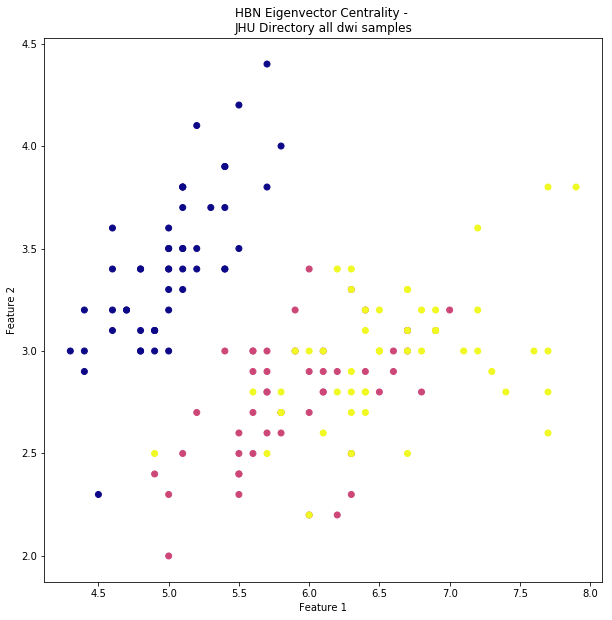

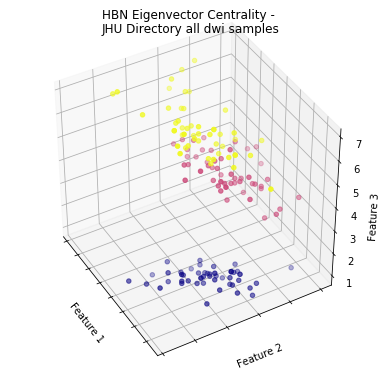

In [67]:
plt.figure(1)
graph2DLabels(mat, iris.target)
plt.figure(2)
graph3DLabels(mat, iris.target)

In [107]:
## Load similarity matrix from Urerf
matrix = open('inTestMat.txt').read()
matrix = [item.split() for item in matrix.split('\n')[:-1]]
inputMat = np.matrix(matrix, dtype = float)
print(inputMat.shape)

# #############################################################################
# Compute Affinity Propagation

#print("AFFINITY PROPAGATION")
#maxDamp, maxPre, maxSil = AffinityPropagationClustering(inputMat,.4,.1, .05, .01)


# #############################################################################
# Compute Mini Batch K Means

print("MINI BATCH K MEANS")
maxClusters, maxSize, maxSil = MiniBatchKMeansClustering(mat, 1, 1, 50, 100)

(150, 150)
MINI BATCH K MEANS
|BatchSize | 150.00 | Clusters |  2.0 | ARI |  0.540 |
|BatchSize | 150.00 | Clusters |  3.0 | ARI |  0.730 |
|BatchSize | 150.00 | Clusters |  4.0 | ARI |  0.640 |
|BatchSize | 150.00 | Clusters |  5.0 | ARI |  0.606 |
|BatchSize | 150.00 | Clusters |  6.0 | ARI |  0.470 |
|BatchSize | 150.00 | Clusters |  7.0 | ARI |  0.497 |
|BatchSize | 150.00 | Clusters |  8.0 | ARI |  0.446 |
|BatchSize | 150.00 | Clusters |  9.0 | ARI |  0.427 |
|BatchSize | 150.00 | Clusters |  10.0 | ARI |  0.364 |
|BatchSize | 150.00 | Clusters |  11.0 | ARI |  0.394 |
|BatchSize | 150.00 | Clusters |  12.0 | ARI |  0.357 |
|BatchSize | 150.00 | Clusters |  13.0 | ARI |  0.291 |
|BatchSize | 150.00 | Clusters |  14.0 | ARI |  0.292 |
|BatchSize | 150.00 | Clusters |  15.0 | ARI |  0.274 |
|BatchSize | 150.00 | Clusters |  16.0 | ARI |  0.268 |
|BatchSize | 150.00 | Clusters |  17.0 | ARI |  0.260 |
|BatchSize | 150.00 | Clusters |  18.0 | ARI |  0.225 |
|BatchSize | 150.00 | Clus

In [10]:
# cluster using the best affinity propagation output
af = AffinityPropagation(damping = maxDamp, preference = maxPre,affinity="precomputed").fit(inputMat)
cluster_centers_indices = af.cluster_centers_indices_
labels_best_af = af.labels_
n_clusters_af = len(cluster_centers_indices)


# cluster using the best mini batch k means output
mb = MiniBatchKMeans(n_clusters= maxClusters, batch_size = maxSize).fit(mat)
cluster_centers_ = mb.cluster_centers_
labels_best_mb = mb.labels_
n_clusters_mb = len(cluster_centers_)


In [11]:

## Sort similarity matrix based on clusters
#create a dictionary of labels and flowers
nodeDict = dict(enumerate(labels_best_af))
#sort the flowers so that they are grouped by cluster label
s = sorted(nodeDict, key=nodeDict.get)
#create a sorted similarity matrix
sortedSimMat = np.empty((len(s), len(s)))
for i in range(0, len(s)):
    node = s[i]
    for j in range(0,len(s)):
        node2 = s[j]
        sortedSimMat[i][j] = inputMat[node, node2]

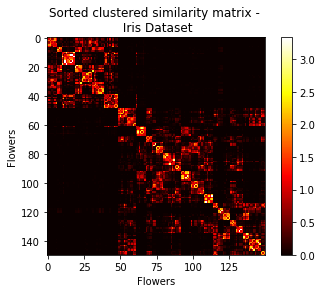

In [12]:
#create a heat map of the sorted similarity matrix
plt.figure(1)
im = plt.imshow(sortedSimMat, cmap='hot', interpolation='nearest')
cbar = plt.colorbar(im) 
plt.xlabel('Flowers')
plt.ylabel('Flowers')
plt.title("Sorted clustered similarity matrix - \n Iris Dataset")
plt.show()

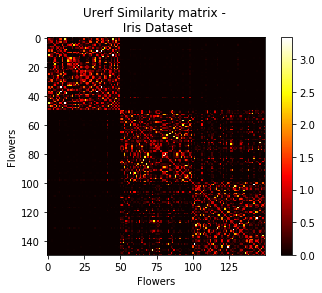

In [13]:
#create a heat map of the sorted similarity matrix
plt.figure(2)
im = plt.imshow(inputMat, cmap='hot', interpolation='nearest')
cbar = plt.colorbar(im) 
plt.xlabel('Flowers')
plt.ylabel('Flowers')
plt.title("Urerf Similarity matrix - \n Iris Dataset")
plt.show()

AFFINITY PROPAGATION
Number of Clusters =  29
Accuracy 0.0466666666667


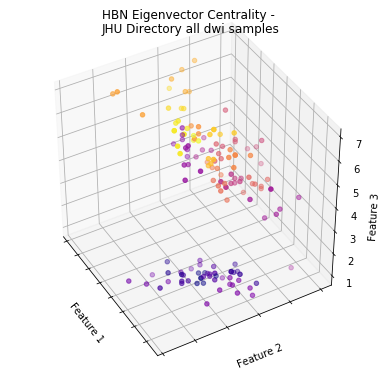

In [23]:
###### Create a plot of the clusters color-coded as such ######
from sklearn.metrics import accuracy_score
print('AFFINITY PROPAGATION')
if (numFeatures ==2):
    graph2DLabels(mat,labels_best_af)
if (numFeatures ==3):
    graph3DLabels(mat,labels_best_af)
print("Number of Clusters = ", n_clusters_af)
print("Accuracy", accuracy_score(labels_best_af, iris.target))

MINI BATCH K MEANS
Number of Clusters =  10
Accuracy 0.0933333333333


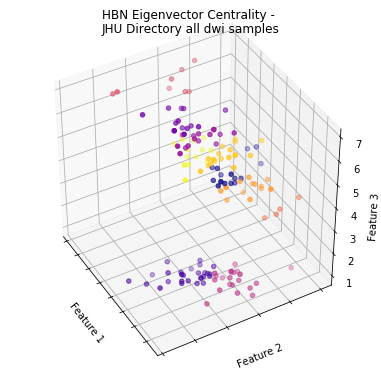

In [24]:
###### Create a plot of the clusters color-coded as such ######
print('MINI BATCH K MEANS')
if (numFeatures ==2):
    graph2DLabels(mat,labels_best_mb)

if (numFeatures ==3):
    graph3DLabels(mat,labels_best_mb)
print("Number of Clusters = ", n_clusters_mb)
print("Accuracy", accuracy_score(labels_best_mb, iris.target))

In [25]:
##### Compare the two Algorithms #####
print("Accuracy", accuracy_score(labels_best_mb, labels_best_af))
print(labels_best_af)
print(labels_best_mb)

Accuracy 0.0533333333333
[ 0  2  7  7  0  1  7  4  2  2  5  4  2  7  6  6  6  0  1  3  5  3  7  4  4
  2  4  0  0  7  2  5  3  6  2  7  5  2  7  4  0 10  7  4  1  2  3  7  3  0
  8  9  8 17 11 12  9 10 11 10 10 18 14 16 18  8 12 13 14 17  9 19 15 16 19
 11 11 28 19 17 17 17 13 20 12  9  8 14 18 17 17 24 13 10 13 18 18 19 10 13
 27 20 26 25 21 23 10 23 15 22  9 25 21 20 20  9 21 22 23 14 27 20 23 15 27
 26 16 24 25 26 23 22 25 16 25 26 27 21 24  8 27  8 20 27 27 28 15 28 27 24]
[1 4 4 4 1 1 4 1 4 4 1 4 4 4 1 1 1 1 1 1 1 1 4 1 4 4 1 1 1 4 4 1 1 1 4 4 1
 4 4 1 1 4 4 1 1 4 1 4 1 4 9 9 9 7 9 0 9 6 9 7 6 0 0 8 7 9 0 0 0 7 8 0 8 8
 9 9 9 9 0 7 7 7 0 8 7 9 9 0 7 7 7 8 0 6 7 0 0 0 6 0 2 8 2 3 2 5 7 5 2 2 3
 3 2 8 8 3 3 5 5 8 2 8 5 8 2 2 8 8 3 2 5 5 3 3 3 5 3 3 8 2 2 3 8 2 2 3 8 3
 3 8]
